<h1 style="text-align:center;">Proyecto Programación</h1>


<h1 style="text-align:center; font-size:28px;">Mónica Ibarra Herrera</h1>

### Librerías

In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

### Database

In [598]:
df=pd.read_csv("C:/Users/cesar/apps/data-analytics/data/raw/wcmatches.csv") #Leer el dataset

In [599]:
df.info() #Saber si hay datos faltantes y ver de qué tipo son

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            900 non-null    int64 
 1   country         900 non-null    object
 2   city            900 non-null    object
 3   stage           900 non-null    object
 4   home_team       900 non-null    object
 5   away_team       900 non-null    object
 6   home_score      900 non-null    int64 
 7   away_score      900 non-null    int64 
 8   outcome         900 non-null    object
 9   win_conditions  62 non-null     object
 10  winning_team    731 non-null    object
 11  losing_team     731 non-null    object
 12  date            900 non-null    object
 13  month           900 non-null    object
 14  dayofweek       900 non-null    object
dtypes: int64(3), object(12)
memory usage: 105.6+ KB


**Features con valores faltantes:**

- win_conditions: 838 valores

- winning_team: 169 valores

- losing_team:169 valores

## Limpieza de datos

In [600]:
#Eliminación de feature de 'win_conditions'
df.drop(columns=['win_conditions'], inplace=True)
df


,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,Argentina,France,1930-07-15,Jul,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2018,Russia,Sochi,Quarterfinals,Russia,Croatia,2,2,A,Croatia,Russia,2018-07-07,Jul,Saturday
896,2018,Russia,Saint Petersburg,Semifinals,France,Belgium,1,0,H,France,Belgium,2018-07-10,Jul,Tuesday
897,2018,Russia,Moscow,Semifinals,Croatia,England,2,1,H,Croatia,England,2018-07-11,Jul,Wednesday
898,2018,Russia,Saint Petersburg,Third place,Belgium,England,2,0,H,Belgium,England,2018-07-14,Jul,Saturday


In [601]:
df[df['stage'].str.contains('Final')]


,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
17,1930,Uruguay,Montevideo,Final,Uruguay,Argentina,4,2,H,Uruguay,Argentina,1930-07-30,Jul,Wednesday
34,1934,Italy,Rome,Final,Italy,Czechoslovakia,2,1,H,Italy,Czechoslovakia,1934-06-10,Jun,Sunday
52,1938,France,Colombes,Final,Hungary,Italy,2,4,A,Italy,Hungary,1938-06-19,Jun,Sunday
69,1950,Brazil,Rio de Janeiro,Final Round,Brazil,Sweden,7,1,H,Brazil,Sweden,1950-07-09,Jul,Sunday
70,1950,Brazil,São Paulo,Final Round,Spain,Uruguay,2,2,D,NaN,NaN,1950-07-09,Jul,Sunday
71,1950,Brazil,Rio de Janeiro,Final Round,Brazil,Spain,6,1,H,Brazil,Spain,1950-07-13,Jul,Thursday
72,1950,Brazil,São Paulo,Final Round,Sweden,Uruguay,2,3,A,Uruguay,Sweden,1950-07-13,Jul,Thursday
73,1950,Brazil,Rio de Janeiro,Final Round,Brazil,Uruguay,1,2,A,Uruguay,Brazil,1950-07-16,Jul,Sunday
74,1950,Brazil,São Paulo,Final Round,Spain,Sweden,1,3,A,Sweden,Spain,1950-07-16,Jul,Sunday
100,1954,Switzerland,Berne,Final,West Germany,Hungary,3,2,H,West Germany,Hungary,1954-07-04,Jul,Sunday


Podemos ver que en el Mundial de 1950 no indica exactamente cuál fue la final (Brasil vs Uruguay, ganó Uruguay)

In [602]:
df.loc[73, 'stage'] = 'Final'

In [603]:
df[df['stage']=='Final']

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
17,1930,Uruguay,Montevideo,Final,Uruguay,Argentina,4,2,H,Uruguay,Argentina,1930-07-30,Jul,Wednesday
34,1934,Italy,Rome,Final,Italy,Czechoslovakia,2,1,H,Italy,Czechoslovakia,1934-06-10,Jun,Sunday
52,1938,France,Colombes,Final,Hungary,Italy,2,4,A,Italy,Hungary,1938-06-19,Jun,Sunday
73,1950,Brazil,Rio de Janeiro,Final,Brazil,Uruguay,1,2,A,Uruguay,Brazil,1950-07-16,Jul,Sunday
100,1954,Switzerland,Berne,Final,West Germany,Hungary,3,2,H,West Germany,Hungary,1954-07-04,Jul,Sunday
135,1958,Sweden,Solna,Final,Sweden,Brazil,2,5,A,Brazil,Sweden,1958-06-29,Jun,Sunday
167,1962,Chile,Santiago,Final,Brazil,Czechoslovakia,3,1,H,Brazil,Czechoslovakia,1962-06-17,Jun,Sunday
199,1966,England,London,Final,England,West Germany,4,2,H,England,West Germany,1966-07-30,Jul,Saturday
231,1970,Mexico,Mexico City,Final,Brazil,Italy,4,1,H,Brazil,Italy,1970-06-21,Jun,Sunday
269,1974,Germany,Munich,Final,West Germany,Netherlands,2,1,H,West Germany,Netherlands,1974-07-07,Jul,Sunday


## Sustitución de datos faltantes 

In [604]:
var_Anan,=np.where(df['winning_team'].isna()) #Obtener el # de observación de los valores faltantes
var_Anan

array([ 29,  35,  37,  44,  58,  62,  70,  79,  84, 104, 106, 107, 111,
       112, 114, 118, 121, 123, 124, 142, 145, 149, 152, 156, 168, 174,
       177, 180, 187, 200, 210, 214, 220, 222, 232, 238, 240, 242, 244,
       245, 247, 248, 251, 264, 270, 275, 283, 284, 285, 288, 297, 298,
       300, 310, 312, 316, 318, 319, 322, 324, 331, 332, 334, 337, 339,
       346, 348, 353, 355, 360, 364, 366, 371, 372, 373, 374, 376, 378,
       390, 395, 420, 422, 424, 431, 434, 436, 439, 446, 465, 468, 470,
       475, 480, 492, 493, 494, 517, 518, 519, 521, 524, 533, 534, 537,
       539, 540, 544, 549, 554, 556, 558, 563, 582, 585, 586, 592, 594,
       598, 599, 606, 609, 611, 615, 616, 619, 622, 648, 656, 660, 665,
       668, 671, 672, 679, 680, 682, 684, 708, 709, 711, 716, 720, 721,
       728, 730, 732, 735, 742, 750, 754, 755, 785, 787, 788, 793, 799,
       803, 808, 813, 816, 839, 841, 846, 856, 866, 870, 871, 873, 879],
      dtype=int64)

Los valores faltantes de estas dos features son de cuando el juego fue empatado por lo que no hay ganador o perdedor. En este caso así se dejarán los datos.

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          900 non-null    int64 
 1   country       900 non-null    object
 2   city          900 non-null    object
 3   stage         900 non-null    object
 4   home_team     900 non-null    object
 5   away_team     900 non-null    object
 6   home_score    900 non-null    int64 
 7   away_score    900 non-null    int64 
 8   outcome       900 non-null    object
 9   winning_team  731 non-null    object
 10  losing_team   731 non-null    object
 11  date          900 non-null    object
 12  month         900 non-null    object
 13  dayofweek     900 non-null    object
dtypes: int64(3), object(11)
memory usage: 98.6+ KB


In [606]:
df.replace({'away_team': 'West Germany', 'home_team': 'West Germany', 'winning_team': 'West Germany', 'losing_team':'West Germany'}, 'Germany', inplace=True)

In [607]:
df.to_csv('df_corregido.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

### Medidas de tendencia central

In [608]:
df[df['stage']=='Final']

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
17,1930,Uruguay,Montevideo,Final,Uruguay,Argentina,4,2,H,Uruguay,Argentina,1930-07-30,Jul,Wednesday
34,1934,Italy,Rome,Final,Italy,Czechoslovakia,2,1,H,Italy,Czechoslovakia,1934-06-10,Jun,Sunday
52,1938,France,Colombes,Final,Hungary,Italy,2,4,A,Italy,Hungary,1938-06-19,Jun,Sunday
73,1950,Brazil,Rio de Janeiro,Final,Brazil,Uruguay,1,2,A,Uruguay,Brazil,1950-07-16,Jul,Sunday
100,1954,Switzerland,Berne,Final,Germany,Hungary,3,2,H,Germany,Hungary,1954-07-04,Jul,Sunday
135,1958,Sweden,Solna,Final,Sweden,Brazil,2,5,A,Brazil,Sweden,1958-06-29,Jun,Sunday
167,1962,Chile,Santiago,Final,Brazil,Czechoslovakia,3,1,H,Brazil,Czechoslovakia,1962-06-17,Jun,Sunday
199,1966,England,London,Final,England,Germany,4,2,H,England,Germany,1966-07-30,Jul,Saturday
231,1970,Mexico,Mexico City,Final,Brazil,Italy,4,1,H,Brazil,Italy,1970-06-21,Jun,Sunday
269,1974,Germany,Munich,Final,Germany,Netherlands,2,1,H,Germany,Netherlands,1974-07-07,Jul,Sunday


In [609]:
finales= df[df['stage']=='Final']
ganadores_finales = finales['winning_team'].value_counts()
ganadores_finales

winning_team
Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
France       2
England      1
Spain        1
Name: count, dtype: int64

C:\Users\cesar\AppData\Local\Temp\ipykernel_23456\2300908469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ganadores_finales.index, y=ganadores_finales.values, palette="viridis")


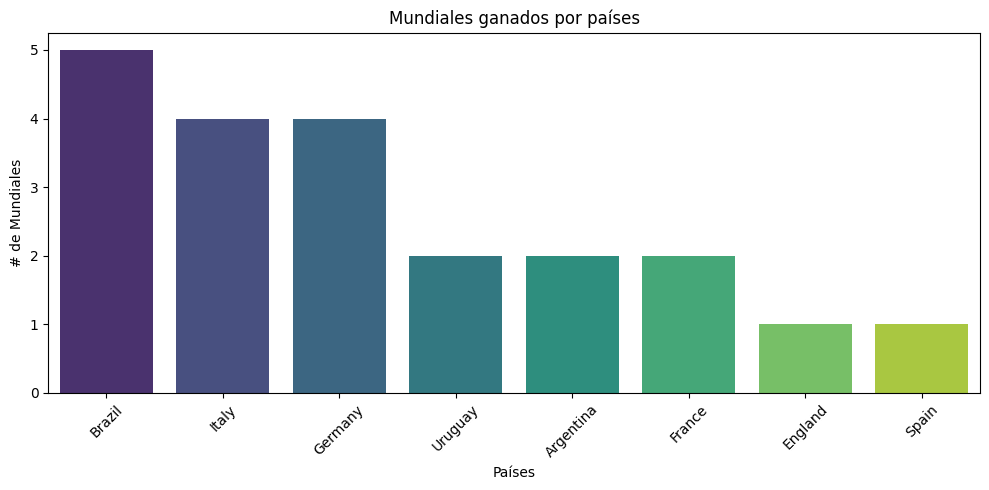

In [610]:
plt.figure(figsize=(10, 5))
sns.barplot(x=ganadores_finales.index, y=ganadores_finales.values, palette="viridis")
plt.title('Mundiales ganados por países')
plt.xlabel('Países')
plt.ylabel('# de Mundiales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Brasil es el país que más mundiales ha ganado, con 5 victorias.

En segundo está Italia con 4 victorias

En tercero West Germany con 3 victorias

### Visualizaciones de México

In [611]:
#Filtrar dataset por partidos jugados por México
partidos_mex=df[(df['home_team'] == 'Mexico') | (df['away_team'] == 'Mexico')]
partidos_mex.head()

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,France,Mexico,1930-07-13,Jul,Sunday
5,1930,Uruguay,Montevideo,Group 1,Chile,Mexico,3,0,H,Chile,Mexico,1930-07-16,Jul,Wednesday
9,1930,Uruguay,Montevideo,Group 1,Argentina,Mexico,6,3,H,Argentina,Mexico,1930-07-19,Jul,Saturday
53,1950,Brazil,Rio de Janeiro,Group 1,Brazil,Mexico,4,0,H,Brazil,Mexico,1950-06-24,Jun,Saturday
59,1950,Brazil,Porto Alegre,Group 1,Mexico,Yugoslavia,1,4,A,Yugoslavia,Mexico,1950-06-28,Jun,Wednesday


In [612]:
partidos_mex.to_csv('partidos_mex.csv', index=False)

In [613]:
#calcular número de partidos jugados por México
len(partidos_mex) #57 partidos que ha jugado México en los mundiales

57

In [614]:
ganados=df[df['winning_team']=='Mexico']
ganados

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
158,1962,Chile,Viña del Mar,Group 3,Czechoslovakia,Mexico,1,3,A,Mexico,Czechoslovakia,1962-06-07,Jun,Thursday
215,1970,Mexico,Mexico City,Group 1,Mexico,El Salvador,4,0,H,Mexico,El Salvador,1970-06-07,Jun,Sunday
223,1970,Mexico,Mexico City,Group 1,Mexico,Belgium,1,0,H,Mexico,Belgium,1970-06-11,Jun,Thursday
367,1986,Mexico,Mexico City,Group B,Mexico,Belgium,2,1,H,Mexico,Belgium,1986-06-03,Jun,Tuesday
389,1986,Mexico,Mexico City,Group B,Mexico,Iraq,1,0,H,Mexico,Iraq,1986-06-11,Jun,Wednesday
396,1986,Mexico,Mexico City,Round of 16,Mexico,Bulgaria,2,0,H,Mexico,Bulgaria,1986-06-15,Jun,Sunday
482,1994,United States,Orlando,Group E,Mexico,Republic of Ireland,2,1,H,Mexico,Republic of Ireland,1994-06-24,Jun,Friday
523,1998,France,Lyon,Group E,South Korea,Mexico,1,3,A,Mexico,South Korea,1998-06-13,Jun,Saturday
589,2002,Japan,Niigata,Group G,Croatia,Mexico,0,1,A,Mexico,Croatia,2002-06-03,Jun,Monday
608,2002,Japan,Rifu,Group G,Mexico,Ecuador,2,1,H,Mexico,Ecuador,2002-06-09,Jun,Sunday


In [615]:
#calcular los partidos ganados por México
len(ganados) #16 partidos ha ganado

16

In [616]:
#media de partidos jugados por México
promedio_partidos_ganados_mexico=(len(ganados) * 100) / len(partidos_mex)
print("Promedio de partidos ganados por México:", promedio_partidos_ganados_mexico)

Promedio de partidos ganados por México: 28.07017543859649


In [617]:
#goles de México en los mundiales
mexico_goles = partidos_mex.groupby('year')[['home_score', 'away_score']].sum().sum(axis=1)
mexico_goles

year
1930    17
1950    12
1954    10
1958     9
1962     7
1966     4
1970    10
1978    14
1986     8
1994     8
1998    15
2002     8
2006    10
2010     9
2014     8
2018     9
dtype: int64

C:\Users\cesar\AppData\Local\Temp\ipykernel_23456\3914490950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goles.index, y=goles.values, palette="viridis")


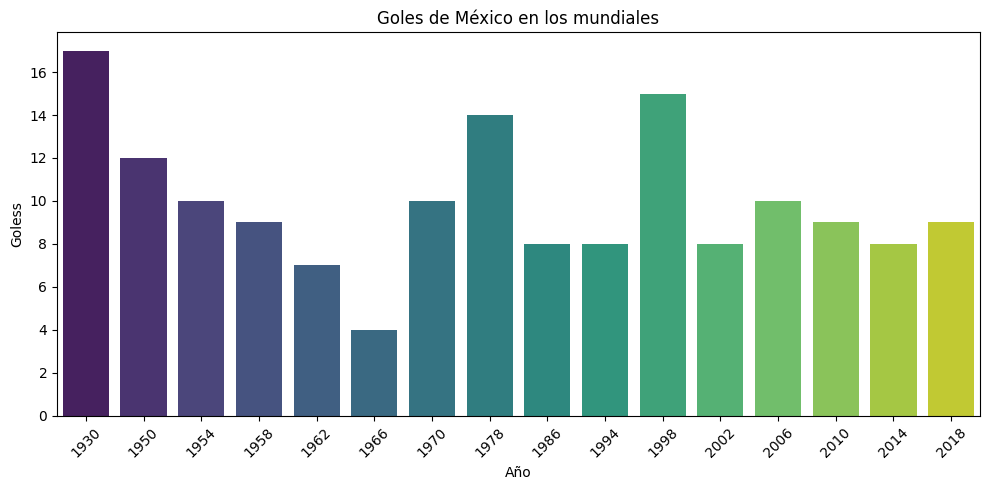

In [618]:
#Gráfica de barras de goles metidos por México en los mundiales
goles = partidos_mex.groupby('year')[['home_score', 'away_score']].sum().sum(axis=1)
plt.figure(figsize=(10, 5))
sns.barplot(x=goles.index, y=goles.values, palette="viridis")
plt.title('Goles de México en los mundiales')
plt.xlabel('Año')
plt.ylabel('Goless')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [619]:
#media de goles metidos por México
mexico_goals_home = df[df['home_team'] == 'Mexico']['home_score']
mexico_goals_away = df[df['away_team'] == 'Mexico']['away_score']
total_goles_mex = mexico_goals_home.sum() + mexico_goals_away.sum()
promedio_goles_mexico = (total_goles_mex) / (len(partidos_mex))

print("Promedio de goles metidos por México:", promedio_goles_mexico)


Promedio de goles metidos por México: 1.0526315789473684


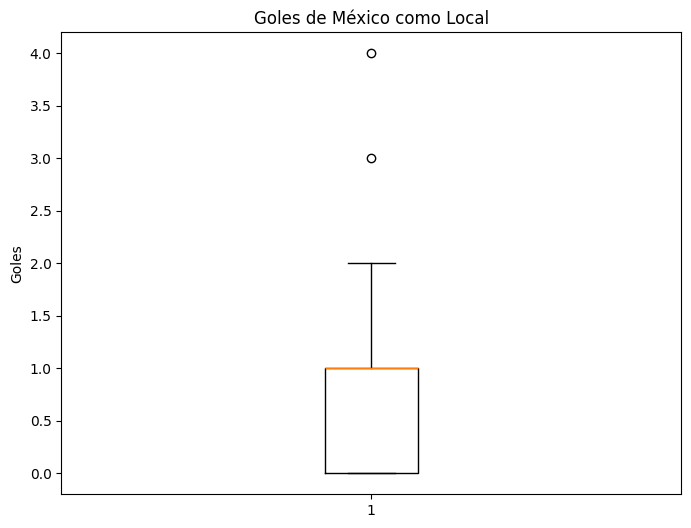

In [620]:
#boxplot de goles me México como local
plt.figure(figsize=(8, 6))
plt.boxplot(mexico_goals_home)
plt.title('Goles de México como Local')
plt.ylabel('Goles')
plt.show()

In [621]:
#calcular valor atípico de 4 goles
df[(df['home_team'] == 'Mexico') & (df['home_score'] == 4)]

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
215,1970,Mexico,Mexico City,Group 1,Mexico,El Salvador,4,0,H,Mexico,El Salvador,1970-06-07,Jun,Sunday


In [622]:
#calcular valor atípico de 3 goles
df[(df['home_team'] == 'Mexico') & (df['home_score'] == 3)]

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
650,2006,Germany,Nuremberg,Group D,Mexico,Iran,3,1,H,Mexico,Iran,2006-06-11,Jun,Sunday


In [623]:
#calcular partidos ganados por El Salvador
df[df['winning_team']=='El Salvador']

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek


In [624]:
#calcular partidos ganados por Iran
df[df['winning_team']=='Iran']

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
545,1998,France,Lyon,Group F,United States,Iran,1,2,A,Iran,United States,1998-06-21,Jun,Sunday
838,2018,Russia,Saint Petersburg,Group B,Morocco,Iran,0,1,A,Iran,Morocco,2018-06-15,Jun,Friday


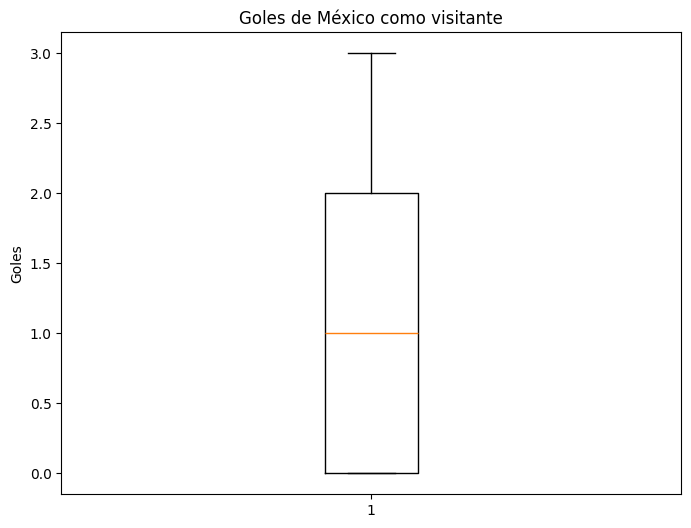

In [625]:
#boxplot de goles me México como visitante
plt.figure(figsize=(8, 6))
plt.boxplot(mexico_goals_away)
plt.title('Goles de México como visitante')
plt.ylabel('Goles')
plt.show()

C:\Users\cesar\AppData\Local\Temp\ipykernel_23456\4187092455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=participacion.index, y=participacion.values, palette="viridis")


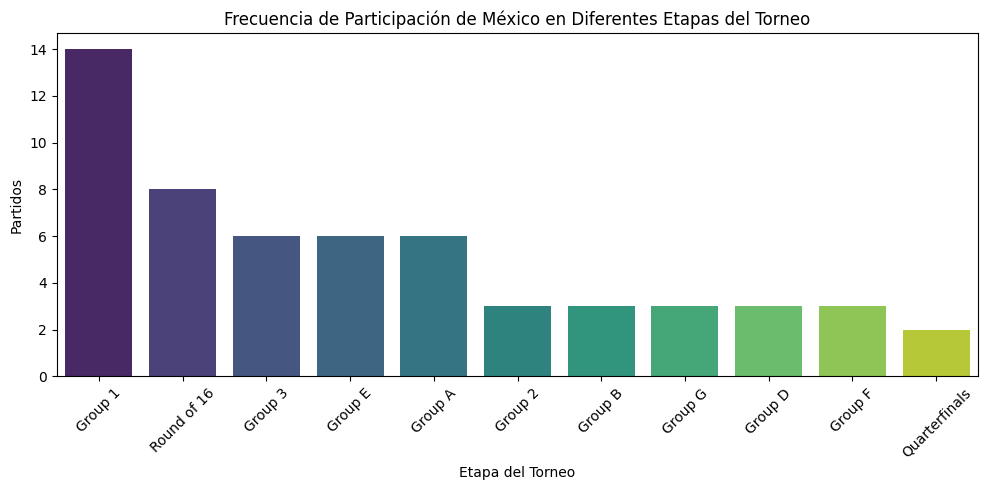

In [626]:
participacion = partidos_mex['stage'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=participacion.index, y=participacion.values, palette="viridis")
plt.title('Frecuencia de Participación de México en Diferentes Etapas del Torneo')
plt.xlabel('Etapa del Torneo')
plt.ylabel('Partidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [627]:
#calcular partidos de México en semifinal
df[(df['stage']=='Quarterfinals') & ((df['home_team'] == 'Mexico') | (df['away_team']=='Mexico'))]

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek
226,1970,Mexico,Toluca,Quarterfinals,Mexico,Italy,1,4,A,Italy,Mexico,1970-06-14,Jun,Sunday
405,1986,Mexico,Monterrey,Quarterfinals,Mexico,Germany,0,0,A,Germany,Mexico,1986-06-21,Jun,Saturday


# Modelo de predicción Regresión Lineal

In [628]:
# Crear la columna 'score_mexico' (target)
partidos_mex['score_mexico'] = np.where(partidos_mex['home_team'] == 'Mexico', partidos_mex['home_score'], partidos_mex['away_score'])
partidos_mex.head()

C:\Users\cesar\AppData\Local\Temp\ipykernel_23456\135139290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partidos_mex['score_mexico'] = np.where(partidos_mex['home_team'] == 'Mexico', partidos_mex['home_score'], partidos_mex['away_score'])


,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek,score_mexico
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,France,Mexico,1930-07-13,Jul,Sunday,1
5,1930,Uruguay,Montevideo,Group 1,Chile,Mexico,3,0,H,Chile,Mexico,1930-07-16,Jul,Wednesday,0
9,1930,Uruguay,Montevideo,Group 1,Argentina,Mexico,6,3,H,Argentina,Mexico,1930-07-19,Jul,Saturday,3
53,1950,Brazil,Rio de Janeiro,Group 1,Brazil,Mexico,4,0,H,Brazil,Mexico,1950-06-24,Jun,Saturday,0
59,1950,Brazil,Porto Alegre,Group 1,Mexico,Yugoslavia,1,4,A,Yugoslavia,Mexico,1950-06-28,Jun,Wednesday,1


In [629]:
def rival(fila):
    if fila['home_team'] == 'Mexico':
        return fila['away_team']
    else:
        return fila['home_team']


In [630]:
partidos_mex['opponent_mex'] = partidos_mex.apply(rival, axis=1)
partidos_mex.head()

C:\Users\cesar\AppData\Local\Temp\ipykernel_23456\163463582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partidos_mex['opponent_mex'] = partidos_mex.apply(rival, axis=1)


,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,winning_team,losing_team,date,month,dayofweek,score_mexico,opponent_mex
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,France,Mexico,1930-07-13,Jul,Sunday,1,France
5,1930,Uruguay,Montevideo,Group 1,Chile,Mexico,3,0,H,Chile,Mexico,1930-07-16,Jul,Wednesday,0,Chile
9,1930,Uruguay,Montevideo,Group 1,Argentina,Mexico,6,3,H,Argentina,Mexico,1930-07-19,Jul,Saturday,3,Argentina
53,1950,Brazil,Rio de Janeiro,Group 1,Brazil,Mexico,4,0,H,Brazil,Mexico,1950-06-24,Jun,Saturday,0,Brazil
59,1950,Brazil,Porto Alegre,Group 1,Mexico,Yugoslavia,1,4,A,Yugoslavia,Mexico,1950-06-28,Jun,Wednesday,1,Yugoslavia


In [631]:
partidos_mex['opponent_mex'].value_counts()

opponent_mex
Brazil                 5
France                 4
Germany                4
Argentina              3
Italy                  3
Belgium                3
Croatia                2
South Korea            2
Netherlands            2
Uruguay                2
Bulgaria               2
Sweden                 2
Iraq                   1
United States          1
Iran                   1
Angola                 1
Portugal               1
Republic of Ireland    1
South Africa           1
Norway                 1
Ecuador                1
Tunisia                1
Paraguay               1
Poland                 1
Chile                  1
El Salvador            1
Soviet Union           1
England                1
Czechoslovakia         1
Spain                  1
Hungary                1
Wales                  1
Switzerland            1
Yugoslavia             1
Cameroon               1
Name: count, dtype: int64

### Codificación de variables

In [632]:
X = partidos_mex[['opponent_mex']]
y = partidos_mex[['score_mexico']]

# Codificación one-hot de las características
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

In [633]:
X_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [634]:
X_encoded.shape


(57, 35)

In [635]:
y.shape

(57, 1)

### Normalización de variables

In [636]:
scaler = MinMaxScaler()
countries_normalized = scaler.fit_transform(X_encoded)

In [637]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [638]:
X_train.shape

(45, 35)

In [639]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [640]:
y_train.shape

(45, 1)

In [641]:
X_test.shape

(12, 35)

In [642]:

# Creación del modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluación del modelo
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Error cuadrático medio (entrenamiento):", train_mse)
print("Error cuadrático medio (prueba):", test_mse)

print("Coeficiente de determinación R^2 (entrenamiento):", train_r2)
print("Coeficiente de determinación R^2 (prueba):", test_r2)



Error cuadrático medio (entrenamiento): 0.17407407407407408
Error cuadrático medio (prueba): 0.6375514403292176
Coeficiente de determinación R^2 (entrenamiento): 0.829380445304937
Coeficiente de determinación R^2 (prueba): 0.2991800961266615


In [643]:
X.shape

(57, 1)

In [644]:
y.shape

(57, 1)

In [645]:
y

,score_mexico
0,1
5,0
9,3
53,0
59,1
68,1
76,0
85,2
108,0
114,1


In [669]:
def predecir_goles(oponente):
    new_df = pd.DataFrame({'opponent_mex': [oponente]})
    # Codificar el nuevo dato
    new_data_encoded = encoder.transform(new_df[['opponent_mex']]).toarray()
    predicted_goals = model.predict(new_data_encoded)
    print("Goles predichos por México contra el oponente {}: {}".format(oponente, int(predicted_goals.item())))

oponente = 'South Africa'
predecir_goles(oponente)

Goles predichos por México contra el oponente South Africa: 1


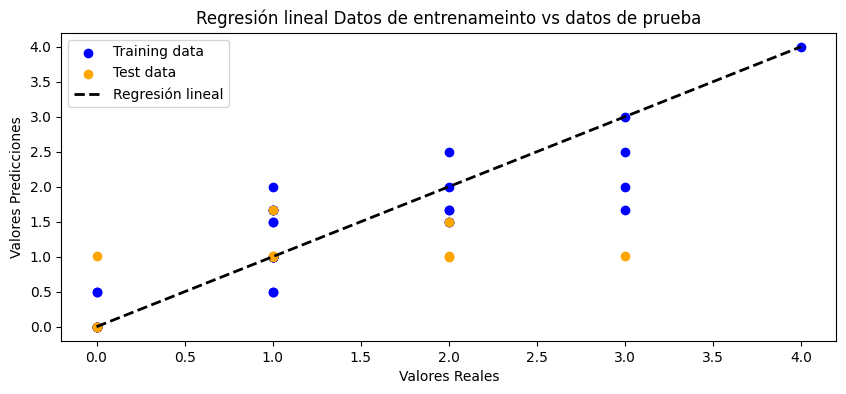

In [647]:
plt.figure(figsize=(10, 4))
plt.scatter(y_train, y_train_pred, label="Training data", color='blue')
plt.scatter(y_test, y_test_pred, label="Test data", color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Regresión lineal')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predicciones")
plt.title("Regresión lineal Datos de entrenameinto vs datos de prueba")
plt.legend()
plt.show()

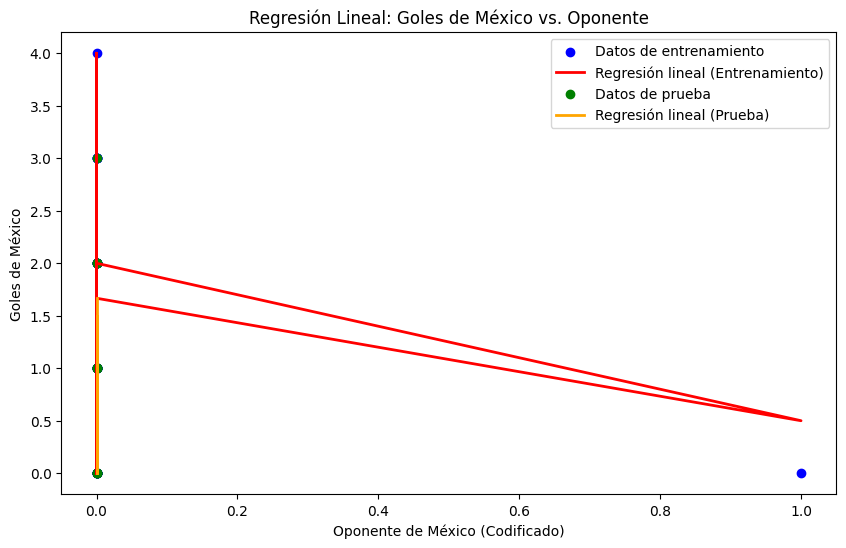

In [648]:
# Seleccionar la primera columna de X_encoded como variable independiente
opponent_column = X_encoded[:, 0]

# Graficar los datos de entrenamiento y prueba junto con las líneas de regresión
plt.figure(figsize=(10, 6))

# Datos de entrenamiento
plt.scatter(opponent_column[:45], y_train, color='blue', label='Datos de entrenamiento')
plt.plot(opponent_column[:45], y_train_pred, color='red', linewidth=2, label='Regresión lineal (Entrenamiento)')

# Datos de prueba
plt.scatter(opponent_column[45:], y_test, color='green', label='Datos de prueba')
plt.plot(opponent_column[45:], y_test_pred, color='orange', linewidth=2, label='Regresión lineal (Prueba)')

plt.xlabel('Oponente de México (Codificado)')
plt.ylabel('Goles de México')
plt.title('Regresión Lineal: Goles de México vs. Oponente')
plt.legend()
plt.show()





